<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter3/stochapprox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.11


# Example 3.5
## Import modules

In [2]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(120)

## Original Program

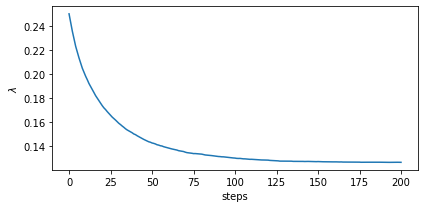

In [4]:
b=100    # choose b large enough, but not too large
delta = 0.01
H = lambda x1, x2: (2*b)**2*np.exp(-np.sqrt(x1**2 + x2**2)/4)*(np.sin(2*np.sqrt(x1**2+x2**2)+1))*(x1**2+x2**2<b**2)
f = 1/(2*b)**2
g = lambda x1, x2, lam: lam*np.exp(-np.sqrt(x1**2+x2**2)*lam)/np.sqrt(x1**2+x2**2)/(2*pi)
beta = 10**-7   #step size very small, as the gradient is large
lam=0.25
lams = np.array([lam])
N=10**4
for i in range(200):
    x1 = -b + 2*b*np.random.rand(N,1)
    x2 = -b + 2*b*np.random.rand(N,1)
    lamL = lam - delta/2
    lamR = lam + delta/2
    estL = np.mean(H(x1,x2)**2*f/g(x1, x2, lamL))
    estR = np.mean(H(x1,x2)**2*f/g(x1, x2, lamR))  #use SAME x1,x2
    gr = (estR-estL)/delta  #gradient
    lam = lam - gr*beta  #gradient descend
    lams = np.hstack((lams, lam))
    beta = beta*0.99

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
lamsize=range(0, (lams.size))    
plt.figure(figsize=[6,3])
plt.plot(lamsize, lams)
plt.xlabel('steps')
plt.ylabel(r'$\lambda$')
plt.tight_layout()
plt.savefig('varmin2py.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%